Case Study 4 :

In [1]:
dataset='/content/drive/MyDrive/ALML DataSets/SUV_Purchase.csv'

import pandas as pd
df=pd.read_csv(dataset)

In [2]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.max('')

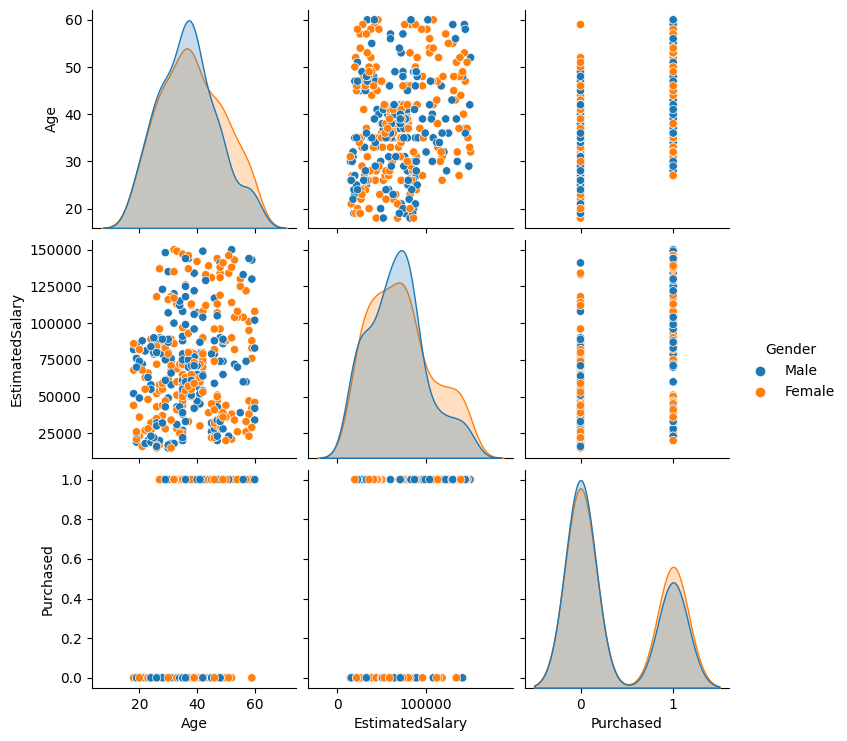

In [3]:
import seaborn as sns

data=df[['Age','EstimatedSalary','Purchased','Gender']]
sns.pairplot(data,hue='Gender')

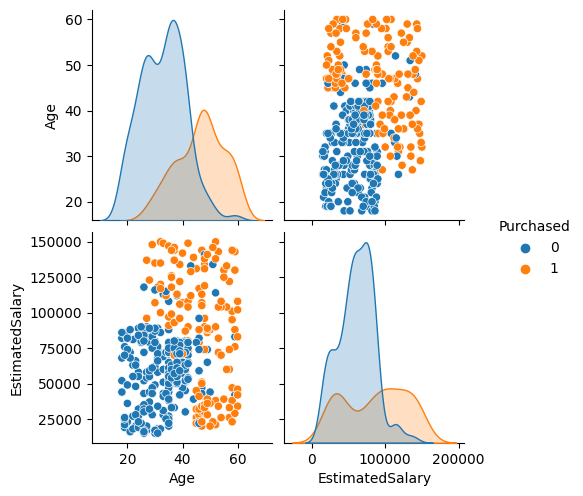

In [4]:
import seaborn as sns

data=df[['Age','EstimatedSalary','Purchased']]
sns.pairplot(data,hue='Purchased')

<Axes: >

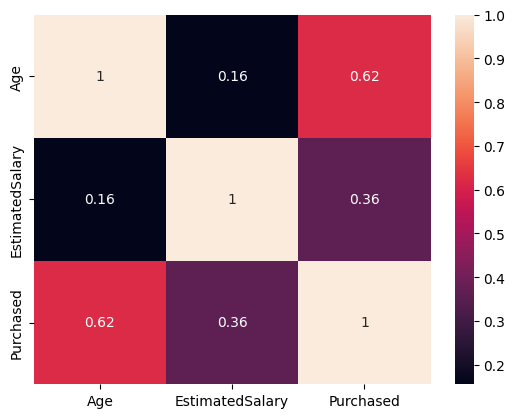

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
# Encoding categorical value

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
gender=df['Gender']
df['Gender']=label_encoder.fit_transform(gender)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: >

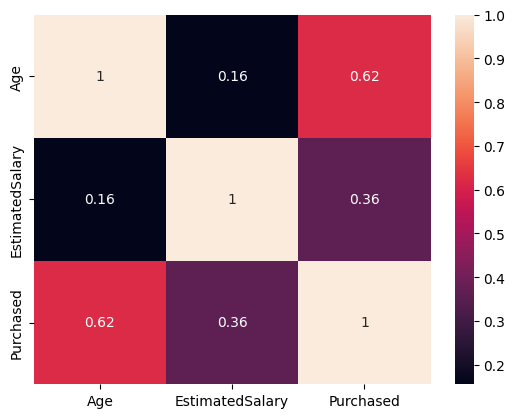

In [7]:
sns.heatmap(data.corr(),annot=True)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]
_________________________________
Model accuracy: 0.8875
-------------------Scaling on X and y---------getting error
_________________________________
Overall Model accuracy: 0.3575


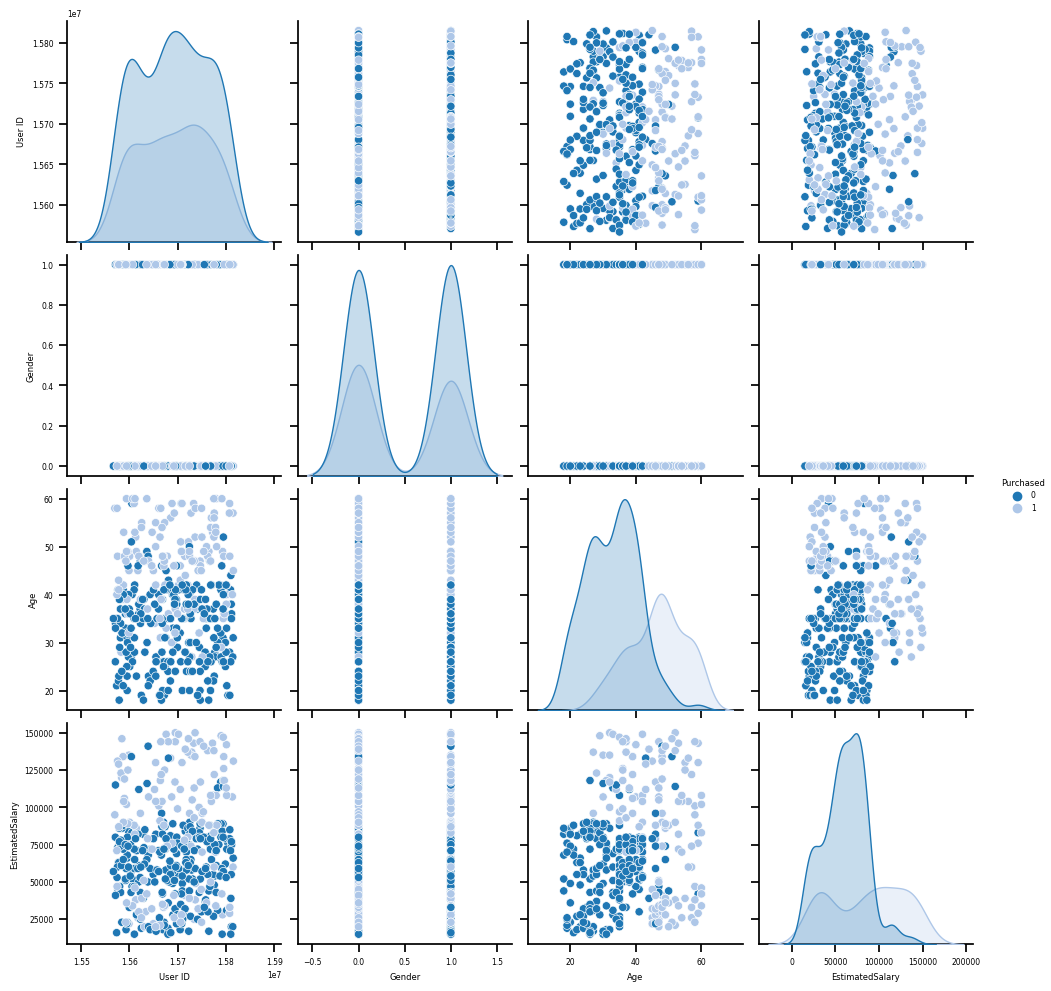

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]


gender=df['Gender']

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(gender)
print(df)

with sns.plotting_context("notebook",font_scale=0.5):
  sns.pairplot(df[['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']] , hue='Purchased' , palette='tab20')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("_________________________________")
print("Model accuracy:", accuracy)

print("-------------------Scaling on X and y---------getting error")
# X = scaler.transform(X)
# y = scaler.transform(y)
accuracy = model.score(X.values, y.values)
print("_________________________________")
print("Overall Model accuracy:", accuracy)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion matrix for training Data :: ")
cm1=confusion_matrix(y_train,model.predict(X_train))
print(cm1)

Confusion matrix for training Data :: 
[[189  16]
 [ 43  72]]


In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion matrix for training Data :: ")
cm2=confusion_matrix(y_test,model.predict(X_test))
print(cm2)

Confusion matrix for training Data :: 
[[50  2]
 [ 7 21]]


In [14]:
print("Confusion matrix for overall Data ")
actual=y
predicted=model.predict(scaler.transform(X))
cm=confusion_matrix(actual,predicted)
print(cm)

Confusion matrix for overall Data 
[[239  18]
 [ 50  93]]


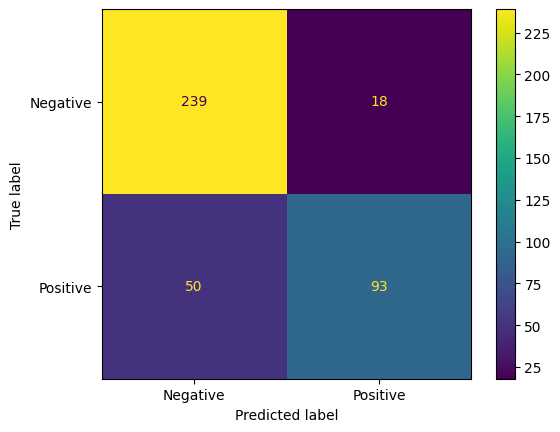

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm=metrics.confusion_matrix(actual,predicted)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative','Positive'])
cm_display.plot()